<a href="https://colab.research.google.com/github/Smchavan491/Cognifyz-internship-task/blob/main/Internship_task_level_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Task1

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import numpy as np
from scipy.stats import pearsonr


In [10]:
data = pd.read_csv('/content/Dataset .csv')

In [11]:
if 'Reviews' in data.columns:
    reviews = data.dropna(subset=['Reviews'])

    # WordCloud for Positive and Negative Keywords
    positive_reviews = ' '.join(reviews[reviews['Aggregate rating'] >= 4]['Reviews'])
    negative_reviews = ' '.join(reviews[reviews['Aggregate rating'] <= 2]['Reviews'])

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    wordcloud_pos = WordCloud(background_color='white', colormap='Greens').generate(positive_reviews)
    plt.imshow(wordcloud_pos, interpolation='bilinear')
    plt.axis('off')
    plt.title('Positive Keywords')

    plt.subplot(1, 2, 2)
    wordcloud_neg = WordCloud(background_color='white', colormap='Reds').generate(negative_reviews)
    plt.imshow(wordcloud_neg, interpolation='bilinear')
    plt.axis('off')
    plt.title('Negative Keywords')

    plt.show()

    # Average review length
    reviews['Review Length'] = reviews['Reviews'].apply(lambda x: len(x.split()))
    avg_length = reviews.groupby('Aggregate rating')['Review Length'].mean()

    plt.figure(figsize=(10, 6))
    sns.lineplot(x=avg_length.index, y=avg_length.values)
    plt.title('Average Review Length vs Rating')
    plt.xlabel('Aggregate Rating')
    plt.ylabel('Average Review Length')
    plt.show()

#Task : 2

Restaurant with Highest Votes: Toit (10934 votes)
Restaurant with Lowest Votes: Cantinho da Gula (0 votes)
Correlation between Votes and Ratings: 0.31


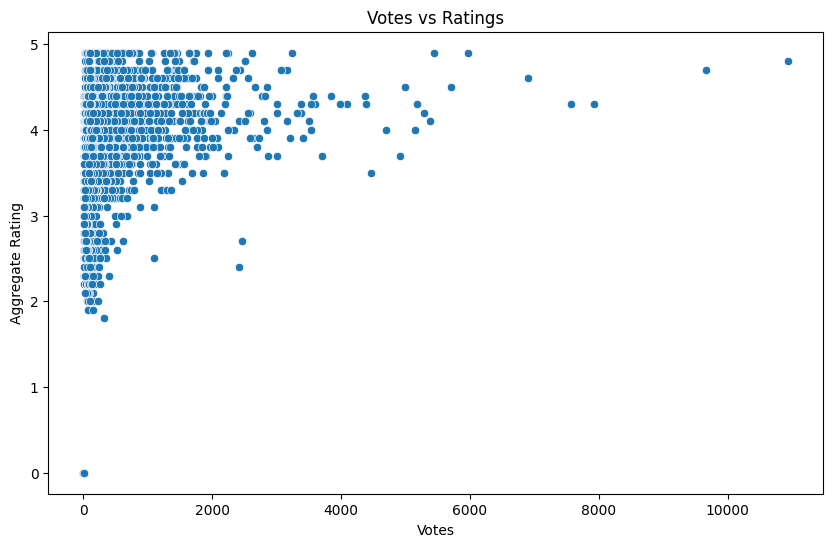

In [12]:
max_votes = data.loc[data['Votes'].idxmax()]
min_votes = data.loc[data['Votes'].idxmin()]

print(f"Restaurant with Highest Votes: {max_votes['Restaurant Name']} ({max_votes['Votes']} votes)")
print(f"Restaurant with Lowest Votes: {min_votes['Restaurant Name']} ({min_votes['Votes']} votes)")

# Correlation between votes and rating
correlation, _ = pearsonr(data['Votes'], data['Aggregate rating'])
print(f"Correlation between Votes and Ratings: {correlation:.2f}")

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Aggregate rating', data=data)
plt.title('Votes vs Ratings')
plt.xlabel('Votes')
plt.ylabel('Aggregate Rating')
plt.show()

#Task : 3

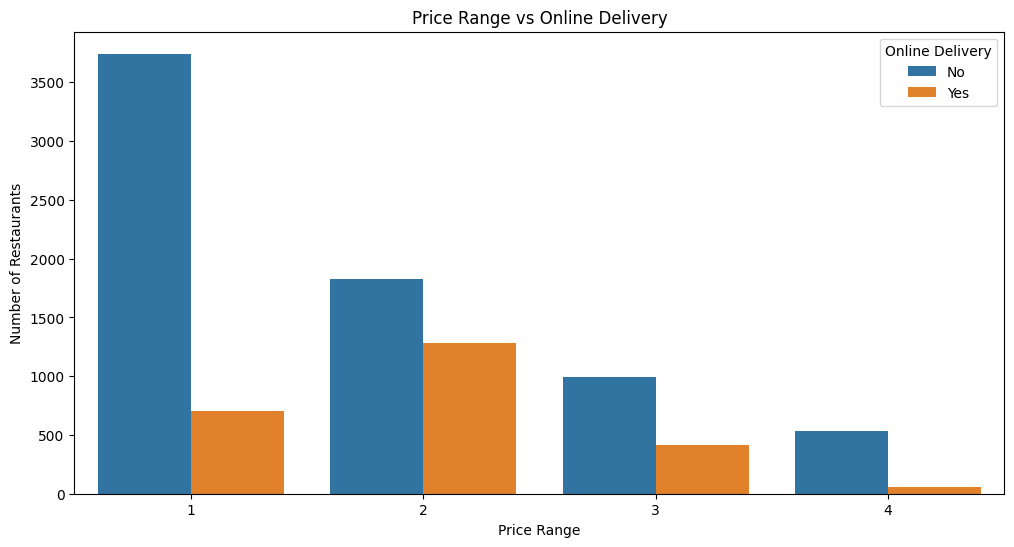

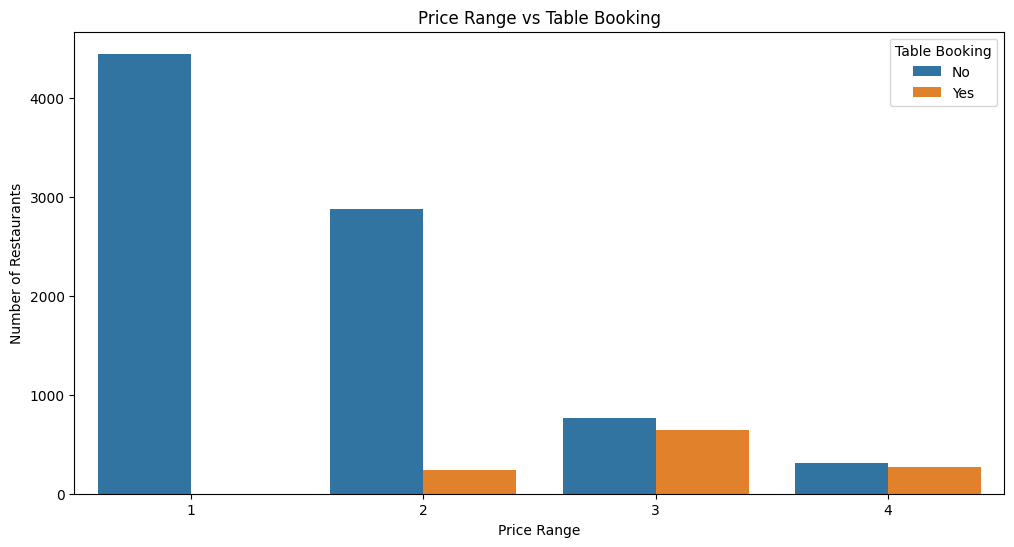

In [13]:
plt.figure(figsize=(12, 6))

# Online Delivery Analysis
sns.countplot(x='Price range', hue='Has Online delivery', data=data)
plt.title('Price Range vs Online Delivery')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.legend(title='Online Delivery')
plt.show()

# Table Booking Analysis
plt.figure(figsize=(12, 6))
sns.countplot(x='Price range', hue='Has Table booking', data=data)
plt.title('Price Range vs Table Booking')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.legend(title='Table Booking')
plt.show()